In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [3]:
# Set figure width and height
matplotlib.rcParams['font.size'] = 16.0

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

In [83]:
import pickle
import os
import pprint
from DataPrep.clusterbuilder import Cluster
input_folder = 'DataPrep/output/train'

with open(os.path.join(input_folder, 'kwt-clusters-lvl_I.pkl'), 'rb') as input_file:
    clusters_lvl_I = pickle.load(input_file)
with open(os.path.join(input_folder, 'kwt-clusters-lvl_II.pkl'), 'rb') as input_file:
    clusters_lvl_II = pickle.load(input_file)
    
print("{} level 1 clusters loaded".format(len(clusters_lvl_I)))
#for key in clusters_lvl_I:
#    print(key)
print("{} level 2 clusters loaded".format(len(clusters_lvl_II)))
#for key in clusters_lvl_II:
#    print(key)
sub_clusters = {}
for key in clusters_lvl_II:
    lvl_I_key = '-'.join(key.split('-')[:2])
    if lvl_I_key not in sub_clusters:
        sub_clusters[lvl_I_key] = []
    sub_clusters[lvl_I_key].append(key)
#pprint.pprint(sub_clusters)

29 level 1 clusters loaded
154 level 2 clusters loaded


In [143]:
def add_cluster_topic(ax, clusters, cluster_key, full=False, color='b'):
    dict_weight = {}
    data = []
    lengths = []
    widths = []
    for topic, w in clusters[cluster_key].features.items():
        if w not in dict_weight.keys():
            dict_weight[w] = []
        dict_weight[w].append(int(topic))
    for w, f in dict_weight.items():
        data.append(f)
        lengths.append(round(w/len(dict_weight.keys())))
        widths.append(round( (w/len(dict_weight.keys())) *0.10))
    offsets = np.zeros(len(lengths))

    if full:
        ax.eventplot(data, lineoffsets=offsets, color=color)
    else:
        # ax.eventplot(data, linewidths=widths, lineoffsets=offsets)
        ax.eventplot(data,linelengths=lengths, lineoffsets=offsets, color=color)

In [145]:
def add_cluster_weight(ax, clusters, cluster_key, orientation='vertical', overlay=None):
    dict_weight = {}
    data = []
    lengths = []
    widths = []
    for topic, w in clusters[cluster_key].features.items():
        if w not in dict_weight.keys():
            dict_weight[w] = []
        dict_weight[w].append(int(topic))
    for w, f in dict_weight.items():
        data.append(w)

    color = 'b' if not overlay else 'r'
    ax.eventplot(data, orientation=orientation, color=color)

In [107]:
def add_cluster_bubbles_old(ax, clusters, cluster_key, overlay=None, marker='o'):
    x = []
    y = []
    
    lvlII_topics = None
    if overlay:
        lvlII_topics = clusters_lvl_II[overlay].features.keys()

    for topic, w in clusters[cluster_key].features.items():
        if not overlay or topic in lvlII_topics:
        x.append(topic)
        y.append(w)
    sizes = [(v/len(x))*0.1 for v in y]
    areas = [(v/len(x))**2.0 for v in y]
    dots = ax.scatter(x, y, s=y, marker=marker)

    color_list = ['b']*len(x)
    if overlay:
        #c_map = plt.get_cmap('YlGnBu')
        #overlay_colors = c_map(np.linspace(0, 1, len(overlay)))
        i=0
        for topic in clusters_lvl_II[overlay].features.keys():
            if topic in x:
                color_list[i] = 'r'
            i+=1
    dots = ax.scatter(x, y, s=y, c=color_list, marker=marker)
    
    ax.set_xlim(-3, max(x)*1.02)
    ax.set_ylim(-1, max(y)*1.02)
    
    max_y = max(y)
    id_max = y.index(max_y)
    max_topic = x[id_max]
    max_weight = y[id_max]
    '''
    plt.annotate('T{} ({})'.format(max_topic, max_weight), 
                 xy=(x[id_max]-10, y[id_max]), xytext=(x[id_max]-700, y[id_max]), 
                 arrowprops=dict(facecolor='black', shrink=0.01, width=2))
    '''

IndentationError: expected an indented block (<ipython-input-107-d21e86ae7c25>, line 11)

In [184]:
def add_cluster_bubbles(ax, clusters, cluster_key, overlay=None, marker='o', x_lim=x_lim, y_lim=y_lim):
    x,y = [], []
    x_sub, y_sub = [], []

    if overlay:
        for topic, w in clusters_lvl_II[overlay].features.items():
            x_sub.append(topic)
            y_sub.append(w)
        sizes = [(v/len(x_sub))*0.1 for v in y_sub]
        areas = [(v/len(x_sub))**2.0 for v in y_sub]
        color_list = ['r']*len(x_sub)
        sub_dots = ax.scatter(x_sub, y_sub, s=y_sub, c=color_list, marker='d')
    
    for topic, w in clusters[cluster_key].features.items():
        if not overlay or topic in clusters_lvl_II[overlay].features.keys():
            x.append(topic)
            y.append(w)
    sizes = [(v/len(x))*0.1 for v in y]
    areas = [(v/len(x))**2.0 for v in y]
    color_list = ['b']*len(x)

    alpha = 0.8
    if overlay:
        alpha = 0.3
    dots = ax.scatter(x, y, s=y, c=color_list, marker='o', alpha=alpha)
    
    if not overlay or (x_lim is None and y_lim is None):
        x_lim =(-3, max(x)*1.02)
        y_lim = (-1, max(y)*1.02)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    
    max_y = max(y)
    id_max = y.index(max_y)
    max_topic = x[id_max]
    max_weight = y[id_max]
    '''
    plt.annotate('T{} ({})'.format(max_topic, max_weight), 
                 xy=(x[id_max]-10, y[id_max]), xytext=(x[id_max]-700, y[id_max]), 
                 arrowprops=dict(facecolor='black', shrink=0.01, width=2))
    '''
    return (x_lim, y_lim)

In [ ]:
fig, axes = plt.subplots(len(clusters), 1, subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for key, ax in zip(clusters.keys(), axes):
    add_cluster_topic(ax, key, full=True)
    ax.set_title(key)
    
plt.savefig(filename='cluster_topics_full.svg')
plt.show()


In [ ]:
fig, axes = plt.subplots(len(clusters), 1, subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for key, ax in zip(clusters.keys(), axes):
    add_cluster_topic(ax, key)
    ax.set_title(key)
    
plt.savefig(filename='cluster_topics_filtered.svg')
plt.show()


In [ ]:
fig, axes = plt.subplots(len(clusters), 1, subplot_kw={'yticks': []})

fig.subplots_adjust(hspace=0.65, wspace=0.05)

for key, ax in zip(clusters.keys(), axes):
    add_cluster_weight(ax, key, orientation='horizontal')
    ax.set_title(key)
    
plt.savefig(filename='cluster_weights.svg')
plt.show()


In [ ]:
fig, axes = plt.subplots(len(clusters), 1, subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.01)

i = 1
for key, ax in zip(clusters.keys(), axes):
    add_cluster_bubbles(ax, key, marker='o')
    ax.set_title(key)
    i += 1
    
plt.savefig(filename='cluster_scatter.svg')
plt.show()


In [178]:
def display_cluster_analysis(key, clusters, overlay=None, display=True, x_lim=None, y_lim=None):
    # start with a rectangular Figure
    fig = plt.figure(1, figsize=(30, 20))
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_topicfull = [left, bottom_h + 0.1, width, 0.1]
    rect_topicfiltered = [left, bottom_h, width, 0.1]
    rect_freqfull = [left_h, bottom, 0.1, height]

    axScatter = plt.axes(rect_scatter)
    x_lim, y_lim = add_cluster_bubbles(axScatter, clusters, key, overlay=overlay, 
                                       marker='o', x_lim=x_lim, y_lim=y_lim)
    if not overlay:
        axtopicFull = plt.axes(rect_topicfull)
        add_cluster_topic(axtopicFull, clusters, key, full=True)    
        axtopicFull.set_xlim(axScatter.get_xlim())
    else:
        axtopicFilteredTop = plt.axes(rect_topicfull)
        add_cluster_topic(axtopicFilteredTop, clusters_lvl_II, overlay, color='r')
        axtopicFilteredTop.set_xlim(axScatter.get_xlim())

    axtopicFiltered = plt.axes(rect_topicfiltered)
    add_cluster_topic(axtopicFiltered, clusters, key)
    axtopicFiltered.set_xlim(axScatter.get_xlim())

    axfreqFull = plt.axes(rect_freqfull)
    add_cluster_weight(axfreqFull, clusters, key)
    if overlay:
        add_cluster_weight(axfreqFull, clusters_lvl_II, overlay, overlay=True)
    axfreqFull.set_ylim(axScatter.get_ylim())
        
    title = key if not overlay else key + " - " + overlay
    plt.title(title)
    plt.savefig(filename=os.path.join(os.path.curdir, 
                                      'DataPrep/output/images','cluster_analysis_{}.svg'.format(title)))
    if display:
        plt.show()
        
    return (x_lim, y_lim)

In [180]:
for key in clusters_lvl_I.keys():
    print('Cluster analysis for level I: {}'.format(key))
    plt.clf()
#    plt.cla()
    x_lim, y_lim = display_cluster_analysis(key, clusters=clusters_lvl_I, display=False)
    for lvlII_key in sub_clusters[key]:
        print('Cluster analysis for level II: {}'.format(lvlII_key))
        plt.clf()
        x_lim, y_lim = display_cluster_analysis(key, clusters=clusters_lvl_I, overlay=lvlII_key, 
                                                display=False, x_lim=x_lim, y_lim=y_lim)

Cluster analysis for level I: KWT-10
Cluster analysis for level II: KWT-10-1
Cluster analysis for level II: KWT-10-4
Cluster analysis for level II: KWT-10-5
Cluster analysis for level II: KWT-10-2
Cluster analysis for level II: KWT-10-3
Cluster analysis for level I: KWT-11
Cluster analysis for level II: KWT-11-1
Cluster analysis for level II: KWT-11-2
Cluster analysis for level I: KWT-20
Cluster analysis for level II: KWT-20-4
Cluster analysis for level II: KWT-20-2
Cluster analysis for level II: KWT-20-1
Cluster analysis for level II: KWT-20-3
Cluster analysis for level I: KWT-1
Cluster analysis for level II: KWT-1-3
Cluster analysis for level II: KWT-1-2
Cluster analysis for level II: KWT-1-4
Cluster analysis for level II: KWT-1-6
Cluster analysis for level II: KWT-1-1
Cluster analysis for level II: KWT-1-5
Cluster analysis for level I: KWT-27
Cluster analysis for level II: KWT-27-1
Cluster analysis for level I: KWT-4
Cluster analysis for level II: KWT-4-2
Cluster analysis for level 

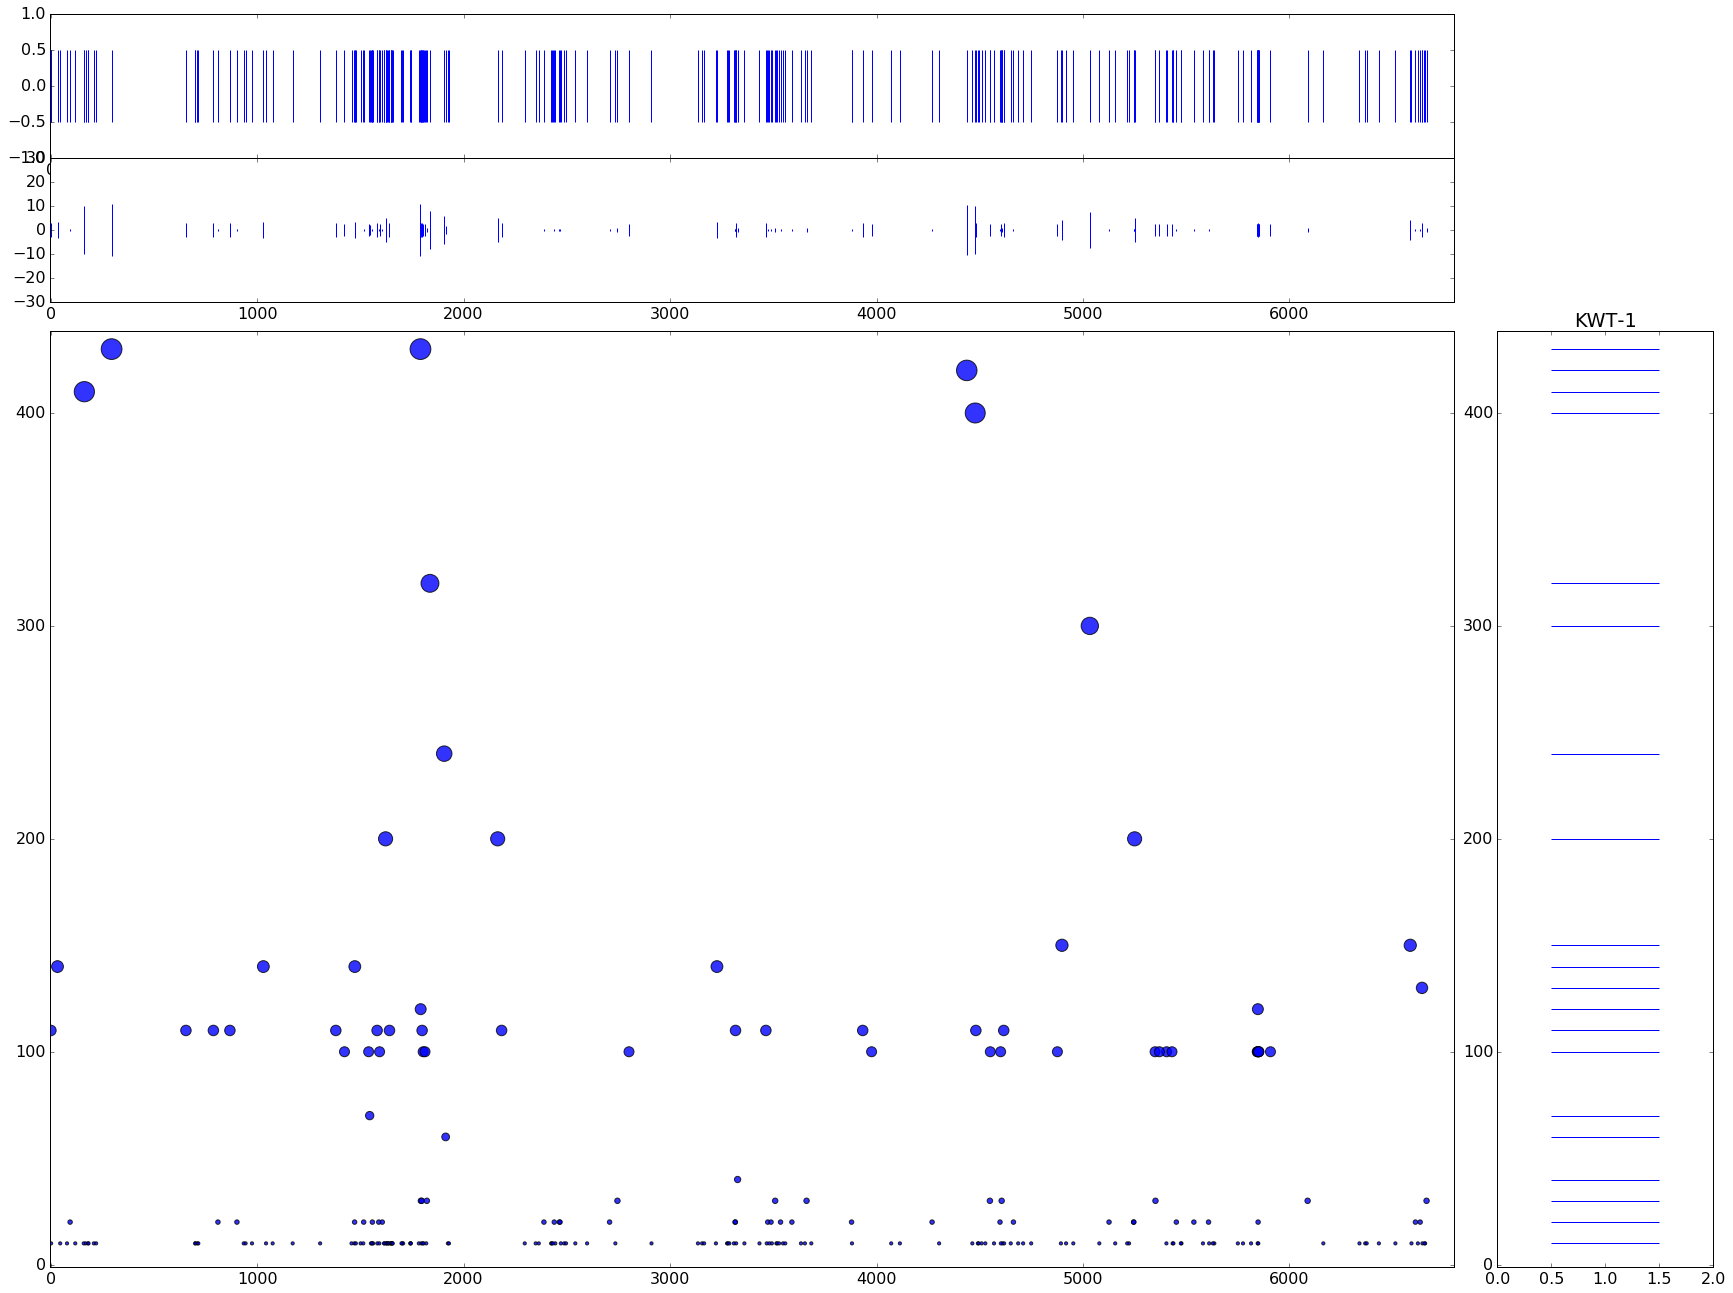

((-3, 6797.28), (-1, 438.6))

In [187]:
#os.path.curdir
plt.clf()
overlay='KWT-1-3'
# display_cluster_analysis('KWT-1', clusters_lvl_I, overlay=overlay, display=True)
display_cluster_analysis('KWT-1', clusters_lvl_I, display=True)